In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

In [2]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',shadow=False,useCMAP = True):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]

    p = np.array([px,py,pz])
    dots = np.array(np.dot(viewVect,p))
    sort = dots.argsort()

    px = px[sort]
    py = py[sort]
    pz = pz[sort]
    clist = np.array(clist)[sort]

    mean_x = px.min()
    mean_y = py.min()
    mean_z = pz.min()

    Xdist = px.max() - px.min()
    Xcntr = (px.max() + px.min())/2.0
    Ydist = py.max() - py.min()
    Ycntr = (py.max() + py.min())/2.0
    Zdist = pz.max() - pz.min()
    Zcntr = (pz.max() + pz.min())/2.0

    dist = 0.6*max(Xdist,Ydist,Zdist)

    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    #ax.view_init(30,-60)

    listTemp = [i for i in range(len(px))]

    if useCMAP:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2,cmap = cmap)
    else:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2)
    
    for p in emphPoints:
        ax.scatter([px[p]],[py[p]],[pz[p]],c='C1',s=100)

    ax.set_xlim([Xcntr - dist, Xcntr + dist])
    ax.set_ylim([Ycntr - dist, Ycntr + dist])
    ax.set_zlim([Zcntr - dist, Zcntr + dist])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    #ax.set_axis_off()
    #plt.show()
    
    if shadow:
        #fig = plt.figure(figsize = (10,10))
        #ax = fig.gca(projection='3d')
        #ax.view_init(30,-60)
        
        ax.scatter(px,py,[Zcntr - dist for p in pz],c='black',alpha=0.01)
        ax.scatter(px,[Ycntr + dist for p in py],pz,c='black',alpha=0.01)
        ax.scatter([Xcntr - dist for p in px],py,pz,c='black',alpha=0.01)

        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
    plt.show()
    
def trianglePlot(arry,clist,emphPoints = [],dim=2):
    
    ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
    axesDist = 0.6*max(ranges)
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
                for p in emphPoints:
                    axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
                axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('direction '+str(row+1))
                    axs[row,col].set_xlabel('direction '+str(col+2))
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [3]:
def logDotProd(mu1,sigma1,mu2,sigma2):
    return np.log(2*sigma1*sigma2)/2-np.log(sigma1**2+sigma2**2)/2-1/4*(mu1-mu2)**2/(sigma1**2+sigma2**2)

def dotProd(mu1,sigma1,mu2,sigma2):
    return np.sqrt((2*sigma1*sigma2)/(sigma1**2+sigma2**2))*np.exp(-1/4*(mu1-mu2)**2/(sigma1**2+sigma2**2))

In [4]:
muRange = np.linspace(-1,1,50)
sigmaRange = 10**np.linspace(-1,1,50)
pairs = [[mu,sigma] for mu in muRange for sigma in sigmaRange]

In [5]:
W = [[logDotProd(mu1,sigma1,mu2,sigma2) for mu1,sigma1 in pairs] for mu2,sigma2 in pairs]

In [6]:
W_sum = [sum(row)/len(row) for row in W]
W_sum_sums = sum(W_sum)/len(W)
CovMat = [[W[i][j]-W_sum[i] - W_sum[j] + W_sum_sums for i in range(len(W))] for j in range(len(W))]

In [7]:
w,vt = np.linalg.eig(CovMat)
print(w[0:8].real)
w = abs(w[0:8].real)
v = vt.T.real[0:8]
projMatEigs = np.dot(v.T,np.diag(np.sqrt(w)))

[ 2211.24745524 -1431.9330874    721.07710701   266.43355121   245.35898637
  -120.05815247    57.882794      51.82872555]


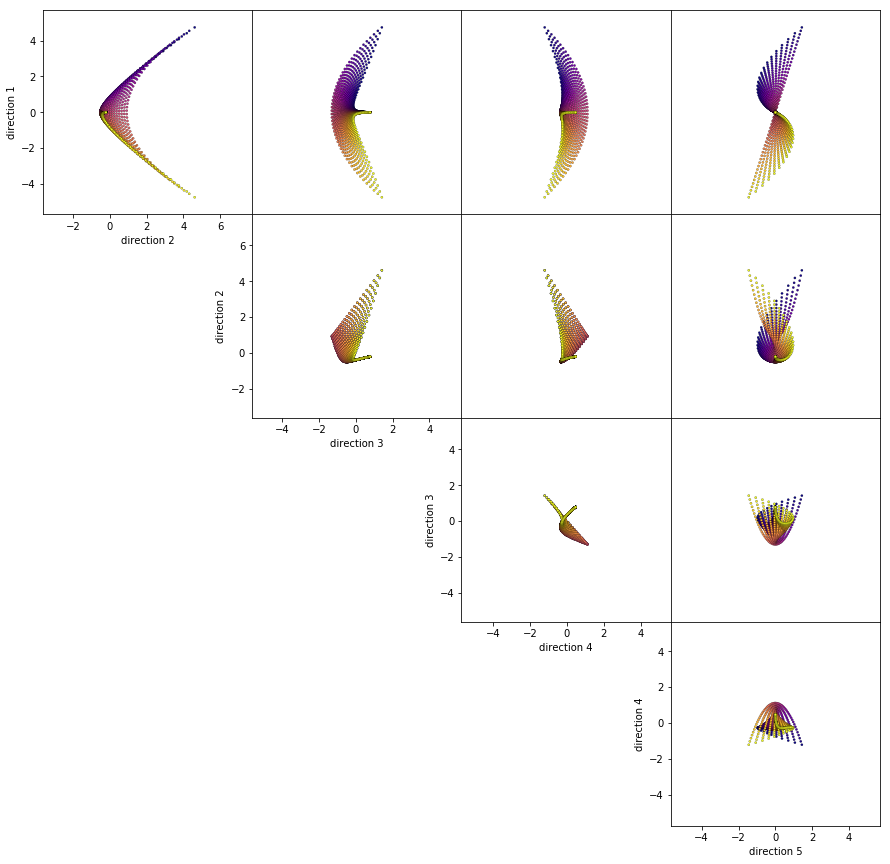

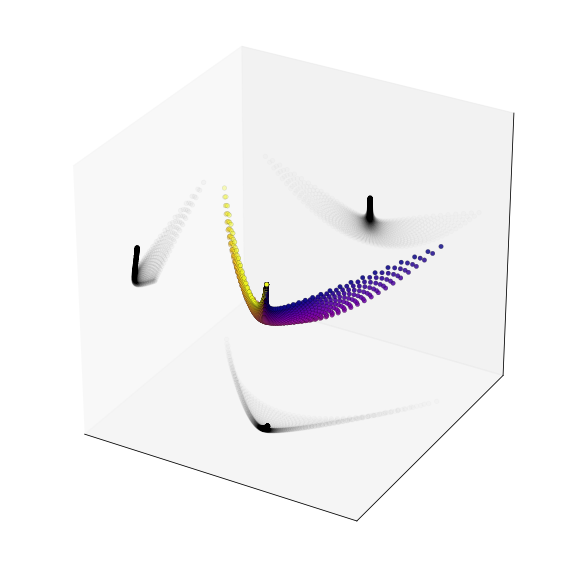

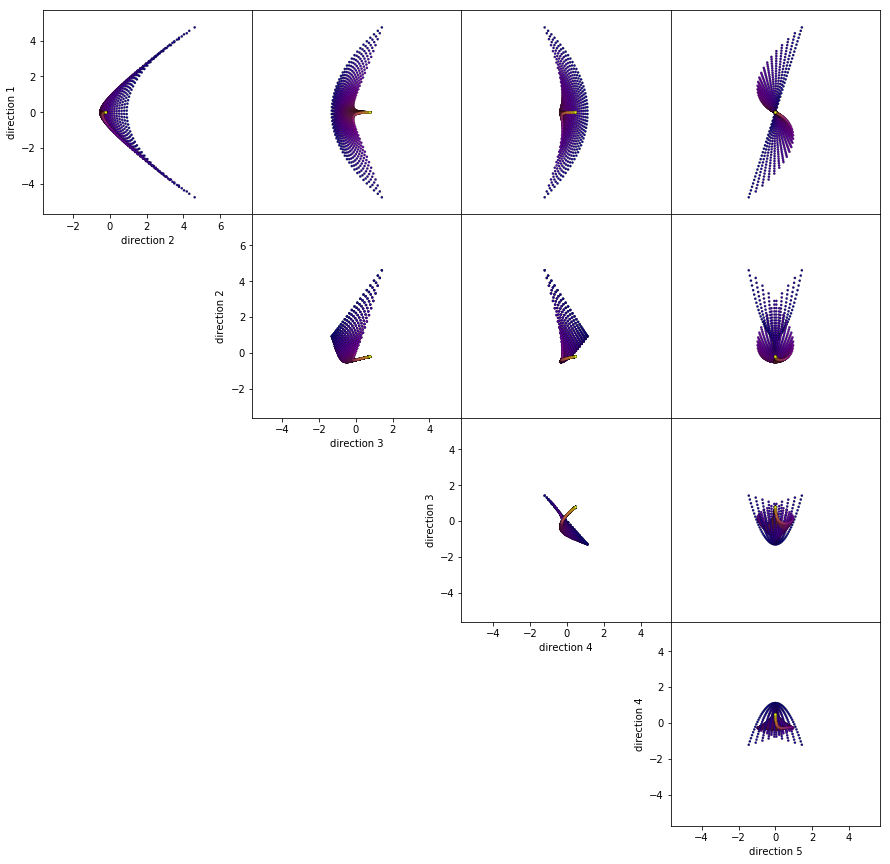

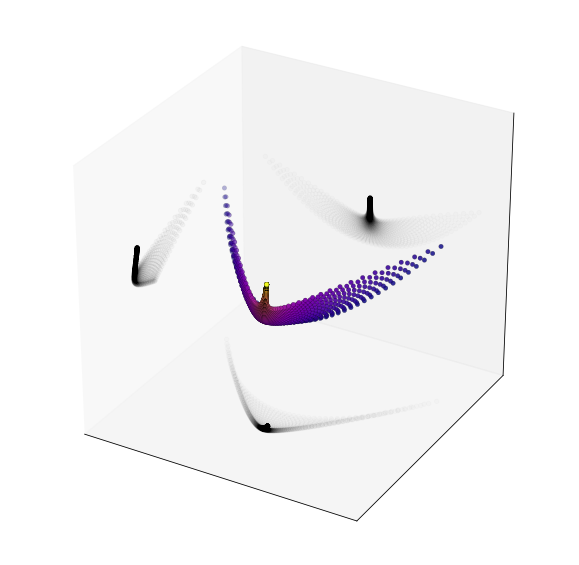

In [8]:
trianglePlot(projMatEigs,[mu for mu,sigma in pairs],dim=4)
plot3D(projMatEigs[:,0],projMatEigs[:,1],projMatEigs[:,2],[mu for mu,sigma in pairs],shadow=True)

trianglePlot(projMatEigs,[np.log(sigma) for mu,sigma in pairs],dim=4)
plot3D(projMatEigs[:,0],projMatEigs[:,1],projMatEigs[:,2],[np.log(sigma) for mu,sigma in pairs],shadow=True)

In [9]:
DDT = [[dotProd(mu1,sigma1,mu2,sigma2) for mu1,sigma1 in pairs] for mu2,sigma2 in pairs]
DDT_sum = [sum(row)/len(row) for row in DDT]
DDT_sum_sums = sum(DDT_sum)/len(DDT)
HellingerCovMat = [[DDT[i][j]-DDT_sum[i] - DDT_sum[j] + DDT_sum_sums for i in range(len(DDT))] for j in range(len(DDT))]

In [10]:
w,vt = np.linalg.eig(HellingerCovMat)
print(w[0:8].real)
w = abs(w[0:8].real)
v = vt.T.real[0:8]
projMatEigsHellinger = np.dot(v.T,np.diag(np.sqrt(w)))

[ 371.70944793  262.90920977  130.02306215  109.60478624   61.61776981
   30.09308946   28.16027724   25.06638667]


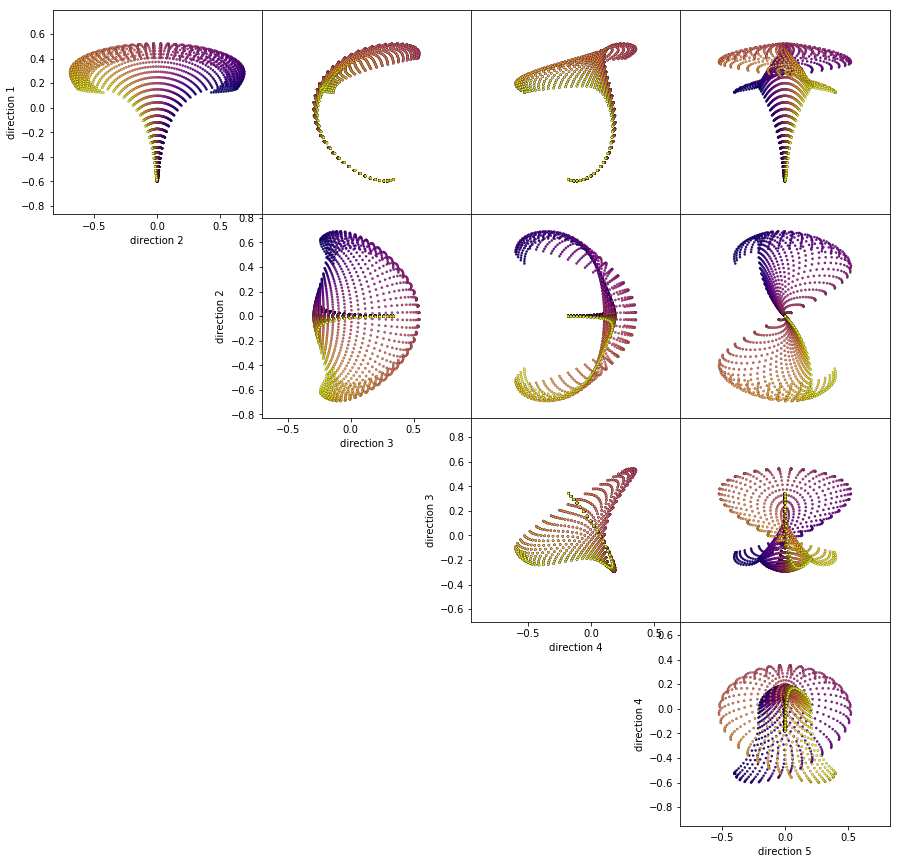

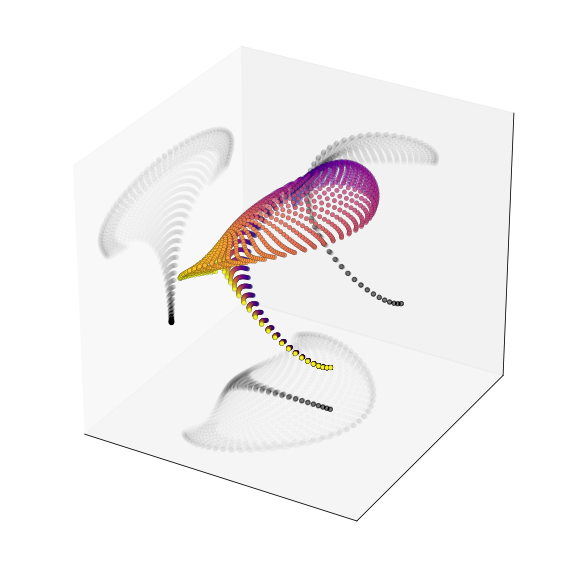

In [11]:
trianglePlot(projMatEigsHellinger,[mu for mu,sigma in pairs],dim=4)
plot3D(projMatEigsHellinger[:,2],projMatEigsHellinger[:,1],projMatEigsHellinger[:,0],[mu for mu,sigma in pairs],shadow=True)